In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Ames_Functions import *
pd.set_option("display.max_columns", None)

In [4]:
df_RE_latest = pd.read_csv("data/Ames_Real_Estate_Data_Latest.csv")# ~22,000 records (2017-2022)
df_housing2006 = pd.read_csv("data/Ames_Housing_Price_Data.csv", index_col = 0) #2580 records
df_RE_2021 = load_state_pkl()["df_RE_latlong2021"][0]
df_RE_2019 = load_state_pkl()["df_RE_latlong2019"][0]

/var/folders/2n/5k95xl754cb_szsgjkmj33k80000gn/T/ipykernel_12150/560450826.py:1: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df_RE_latest = pd.read_csv("data/Ames_Real_Estate_Data_Latest.csv")# ~22,000 records (2017-2022)


In [19]:
df_RE_latest.describe().filter(regex = "Area|SF")

,LotArea,TtlBsmtSF,PoolArea,GarageArea
count,18221.000000,18221.000000,18221.000000,18221.000000
mean,8701.858295,753.208715,2.431974,374.130564
std,11456.041449,639.754996,40.040136,278.454910
min,0.000000,0.000000,0.000000,0.000000
25%,2915.000000,0.000000,0.000000,166.000000
50%,8120.000000,835.000000,0.000000,394.000000
75%,10819.000000,1193.000000,0.000000,544.000000
max,501810.000000,6962.000000,1536.000000,4500.000000


In [18]:
df_RE_latest.filter(regex = "Ext").value_counts().rename("count").reset_index()

,Ext1,Ext2,count
0,VinylSd,VinylSd,4412
1,MetalSd,MetalSd,2133
2,HdBoard,HdBoard,1773
3,Wd Sdng,Wd Sdng,1655
4,MetalSd,BrkFace,1314
...,...,...,...
134,VinylSd,No Data,1
135,Stone,Wd Sdng,1
136,Stone,Stone,1
137,Stone,BrkFace,1


<AxesSubplot:>

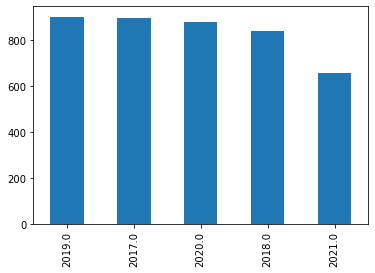

In [7]:
df_RE_latest.YrSold_YYYY.value_counts().plot.bar()

In [11]:
df_RE_latest.query("YrSold_YYYY == 2021").MoSold_MM.value_counts()

6.0    115
7.0    114
5.0    105
4.0     94
3.0     69
1.0     64
8.0     52
2.0     44
Name: MoSold_MM, dtype: int64

In [32]:
#Percentage of duplicate records for 2021 and 2019 (3.65% and 0.331% respectively)
((df_RE_latest.query("YrSold_YYYY == 2021").duplicated().sum()/df_RE_latest.query("YrSold_YYYY == 2021").shape[0])*100,
 (df_RE_latest.query("YrSold_YYYY == 2019").duplicated().sum()/df_RE_latest.query("YrSold_YYYY == 2019").shape[0])*100)

(3.65296803652968, 0.33185840707964603)

In [29]:
df_RE_latest.query("YrSold_YYYY == 2019").shape[0]

904

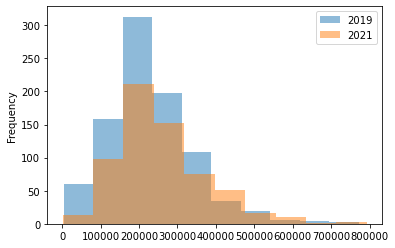

In [21]:
#SalePrice distributions for 2019 and 2021
df_RE_2019.SalePrice.plot.hist(alpha = 0.5, label = '2019')
df_RE_2021.SalePrice.plot.hist(alpha = 0.5, label = '2021')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Year', ylabel='GLA'>

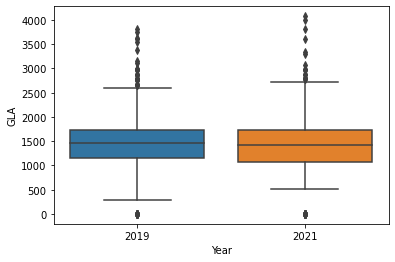

In [31]:
df_boxplot = pd.DataFrame([[GLA, 2019] for GLA in df_RE_2019.GLA] + [[GLA, 2021] for GLA in df_RE_2021.GLA], columns = ["GLA", "Year"])
sns.boxplot(x = "Year", y = "GLA", data = df_boxplot)
# df_RE_2019.GLA.plot.box()
# df_RE_2021.GLA.plot.box()
# plt.show()

In [40]:
df_RE_2021.GLA.skew()

0.5396491898458086